In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
PNS_PATH = '../../PNS/data/processed/pns_2019.csv'
df = pd.read_csv(PNS_PATH, low_memory=False)

In [3]:
df

,[V0001] Unidade da Federação,[V0024] Estrato,[UPA_PNS] UPA,[V0006_PNS] Número de ordem do domicílio na PNS,[V0015] Tipo da entrevista,[V0020] Ano de referência,[V0022] Total de moradores,[V0026] Tipo de situação censitária,[V0031] Tipo de área,[V0025A] Seleção do morador de 15 anos ou mais para responder o questionário individual,...,[VDC003] Total de moradores com 15 anos ou mais,[VDD004A] Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino Fundamental - SISTEMA DE 9 ANOS,[VDE001] Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade,[VDE002] Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade,"[VDF002] ""Rendimento domiciliar (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)""","[VDF003] ""Rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)""","[VDF004] Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)",[VDM001] Faixa de tempo gasto por dia no deslocamento casa-trabalho pelas pessoas ocupadas que se deslocavam para o trabalho,[VDP001] Tipo de cigarro industrializado comprado,"[VDDATA] Data de geração do arquivo de microdados. Data ordenada na forma: ano (4 algarismos), mês (2) e dia (2) - AAAAMMDD"
0,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Selecionado,...,3,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
1,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não selecionado,...,3,Sem instrução,Pessoas fora da força de trabalho,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
2,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não selecionado,...,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
3,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não aplicável,...,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
4,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não aplicável,...,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279377,Distrito Federal,5310220,530044434,13,1,2019,1,Rural,Capital,Selecionado,...,1,Fundamental completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1500.0,1500.0,Mais de 1 até 2 salários mínimos,Menos de 30 minutos,NaN,20210426
279378,Distrito Federal,5310220,530044434,14,1,2019,4,Rural,Capital,Não selecionado,...,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN,20210426
279379,Distrito Federal,5310220,530044434,14,1,2019,4,Rural,Capital,Selecionado,...,3,Superior completo,Pessoas fora da força de trabalho,NaN,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN,20210426
279380,Distrito Federal,5310220,530044434,14,1,2019,4,Rural,Capital,Não selecionado,...,3,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN,20210426


In [4]:
cols = df.columns.to_list()
col_code = [col.split(']')[0][1:] for col in cols]

In [5]:
code_to_desc = dict(zip(col_code, cols))

In [6]:
code_to_desc

{'V0001': '[V0001] Unidade da Federação',
 'V0024': '[V0024] Estrato',
 'UPA_PNS': '[UPA_PNS] UPA',
 'V0006_PNS': '[V0006_PNS] Número de ordem do domicílio na PNS',
 'V0015': '[V0015] Tipo da entrevista',
 'V0020': '[V0020] Ano de referência',
 'V0022': '[V0022] Total de moradores',
 'V0026': '[V0026] Tipo de situação censitária',
 'V0031': '[V0031] Tipo de área',
 'V0025A': '[V0025A] Seleção do morador de 15 anos ou mais para responder o questionário individual',
 'V0025B': '[V0025B] Seleção do morador de 15 anos ou mais para ter medida antropométrica aferida',
 'A001': '[A001] Tipo do domicílio',
 'A002010': '[A002010] Qual é o material que predomina na construção das paredes externas deste domicílio?',
 'A003010': '[A003010] Material predominante na cobertura (telhado) do domicílio',
 'A004010': '[A004010] Qual é o material que predomina no piso deste domicílio',
 'A01001': '[A01001]  Quantos cômodos têm este domicílio',
 'A011': '[A011] Quantos cômodos estão servindo permanentement

In [7]:
df.columns = col_code

In [8]:
df.columns

Index(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'V0015', 'V0020', 'V0022',
       'V0026', 'V0031', 'V0025A',
       ...
       'VDC003', 'VDD004A', 'VDE001', 'VDE002', 'VDF002', 'VDF003', 'VDF004',
       'VDM001', 'VDP001', 'VDDATA'],
      dtype='object', length=816)

In [9]:
df

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDC003,VDD004A,VDE001,VDE002,VDF002,VDF003,VDF004,VDM001,VDP001,VDDATA
0,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Selecionado,...,3,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
1,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não selecionado,...,3,Sem instrução,Pessoas fora da força de trabalho,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
2,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não selecionado,...,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
3,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não aplicável,...,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
4,Rondônia,1110011,110000016,1,1,2019,6,Urbano,Capital,Não aplicável,...,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN,20210426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279377,Distrito Federal,5310220,530044434,13,1,2019,1,Rural,Capital,Selecionado,...,1,Fundamental completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1500.0,1500.0,Mais de 1 até 2 salários mínimos,Menos de 30 minutos,NaN,20210426
279378,Distrito Federal,5310220,530044434,14,1,2019,4,Rural,Capital,Não selecionado,...,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN,20210426
279379,Distrito Federal,5310220,530044434,14,1,2019,4,Rural,Capital,Selecionado,...,3,Superior completo,Pessoas fora da força de trabalho,NaN,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN,20210426
279380,Distrito Federal,5310220,530044434,14,1,2019,4,Rural,Capital,Não selecionado,...,3,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN,20210426


In [10]:
columns_to_drop = ['V0024', 'UPA_PNS', 'V0006_PNS', 'V0020', 'VDDATA', 'V0015', 'V001', 'V00101', 'C00701', 'C00702', 'C00703']
df.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
df

,V0001,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,...,VDC001,VDC003,VDD004A,VDE001,VDE002,VDF002,VDF003,VDF004,VDM001,VDP001
0,Rondônia,6,Urbano,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
1,Rondônia,6,Urbano,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Sem instrução,Pessoas fora da força de trabalho,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
2,Rondônia,6,Urbano,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
3,Rondônia,6,Urbano,Capital,Não aplicável,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
4,Rondônia,6,Urbano,Capital,Não aplicável,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279377,Distrito Federal,1,Rural,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,...,1.0,1,Fundamental completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1500.0,1500.0,Mais de 1 até 2 salários mínimos,Menos de 30 minutos,NaN
279378,Distrito Federal,4,Rural,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,4.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN
279379,Distrito Federal,4,Rural,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,4.0,3,Superior completo,Pessoas fora da força de trabalho,NaN,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN
279380,Distrito Federal,4,Rural,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,4.0,3,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN


In [12]:
def code_of_desc(value):
    """
    Extracts the code from description
    
    example: 
    code_of_desc('[V0001] Unidade da Federação') -> 'V0001'
    """
    if isinstance(value, str):
        return value.split(']')[0][1:]
    elif isinstance(value, list):
        return [i.split(']')[0][1:] for i in value]
    else:
        return None

def cols_contains(name):
    """
    Return columns codes which contains the substring
    
    example: 
    cols contains('federação') -> '[V0001] Unidade da Federação'
    """
    return [code_of_desc(c) for c in list(code_to_desc.values()) if name in c.lower()]

In [13]:
depression_cols = cols_contains('depressão')
for col in depression_cols:
    print (code_to_desc[col])

[Q092] Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
[Q09201] Algum médico já lhe receitou algum medicamento para depressão?
[Q09202] Nas duas últimas semanas o(a) senhor(a) usou algum medicamento para depressão?
[Q09301] Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão? 
[Q094] O(A) Sr(a) vai ao médico/serviço de saúde regularmente por causa da depressão ou só quando tem algum problema?
[Q09502] Qual o principal motivo do(a) Sr(a) não visitar o médico/serviço de saúde regularmente por causa da depressão? 
[Q09605] Por causa da depressão Faz psicoterapia 
[Q09606] Por causa da depressão Toma medicamentos
[Q09607] Por causa da depressão Faz uso de acupuntura, plantas medicinais e fitoterapia, homeopatia, meditação, yoga, tai chi chuan, liang gong ou alguma outra prática integrativa e complementar 
[Q098] Algum dos medicamentos para depressão foi obtido em serviço público de saúde? 
[Q10101] Quando foi a 

In [14]:
depression_cols

['Q092',
 'Q09201',
 'Q09202',
 'Q09301',
 'Q094',
 'Q09502',
 'Q09605',
 'Q09606',
 'Q09607',
 'Q098',
 'Q10101',
 'Q10202',
 'Q106',
 'Q109',
 'V03502',
 'H021']

In [15]:
df.drop(depression_cols[1:], axis=1, inplace=True)

In [16]:
df

,V0001,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,...,VDC001,VDC003,VDD004A,VDE001,VDE002,VDF002,VDF003,VDF004,VDM001,VDP001
0,Rondônia,6,Urbano,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
1,Rondônia,6,Urbano,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Sem instrução,Pessoas fora da força de trabalho,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
2,Rondônia,6,Urbano,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
3,Rondônia,6,Urbano,Capital,Não aplicável,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
4,Rondônia,6,Urbano,Capital,Não aplicável,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Sem instrução,NaN,NaN,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279377,Distrito Federal,1,Rural,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,...,1.0,1,Fundamental completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1500.0,1500.0,Mais de 1 até 2 salários mínimos,Menos de 30 minutos,NaN
279378,Distrito Federal,4,Rural,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,4.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN
279379,Distrito Federal,4,Rural,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,4.0,3,Superior completo,Pessoas fora da força de trabalho,NaN,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN
279380,Distrito Federal,4,Rural,Capital,Não selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,4.0,3,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,13390.0,3348.0,Mais de 3 até 5 salários mínimos,NaN,NaN


In [17]:
na = df.Q092.isna()

In [18]:
df = df.drop(na[na == True].index)

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df

,V0001,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,...,VDC001,VDC003,VDD004A,VDE001,VDE002,VDF002,VDF003,VDF004,VDM001,VDP001
0,Rondônia,6,Urbano,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,6.0,3,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2098.0,350.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
1,Rondônia,4,Urbano,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,4.0,4,Médio incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1000.0,250.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
2,Rondônia,8,Urbano,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,8.0,5,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,4000.0,500.0,Mais de ½ até 1 salário mínimo,2 horas ou mais,NaN
3,Rondônia,1,Urbano,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,...,1.0,1,Sem instrução,Pessoas na força de trabalho,Pessoas Ocupadas,324.0,324.0,Mais de ¼ até ½ salário mínimo,Menos de 30 minutos,NaN
4,Rondônia,2,Urbano,Capital,Selecionado,NaN,Apartamento,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,2.0,1,Superior incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,0.0,0.0,Até ¼ salário mínimo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,Distrito Federal,3,Rural,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,...,3.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,5400.0,1800.0,Mais de 1 até 2 salários mínimos,De 1 hora até menos de 2 horas,Legal
90842,Distrito Federal,2,Rural,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,...,2.0,2,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,3000.0,1500.0,Mais de 1 até 2 salários mínimos,De 1 hora até menos de 2 horas,Legal
90843,Distrito Federal,4,Rural,Capital,Selecionado,NaN,Casa,Alvenaria sem revestimento,Telha sem laje de concreto,Cimento,...,4.0,2,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,NaN,1497.0,374.0,Mais de ¼ até ½ salário mínimo,NaN,NaN
90844,Distrito Federal,3,Rural,Capital,Selecionado,NaN,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",...,3.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,6050.0,2017.0,Mais de 2 até 3 salários mínimos,NaN,NaN


In [21]:
def select_by_code(self, code):
    return df[col_starts_with(self, code)]

df.select_by_code = select_by_code

In [22]:
df[df.Q092 == 'Sim']['V0001'].value_counts()

Minas Gerais           746
São Paulo              691
Rio Grande do Sul      681
Paraná                 549
Santa Catarina         502
Rio de Janeiro         439
Espírito Santo         412
Ceará                  342
Mato Grosso do Sul     327
Goiás                  310
Pernambuco             294
Rio Grande do Norte    259
Sergipe                253
Maranhão               252
Paraíba                245
Bahia                  243
Distrito Federal       236
Alagoas                211
Piauí                  202
Mato Grosso            202
Rondônia               169
Pará                   161
Acre                   146
Amazonas               142
Tocantins              135
Roraima                118
Amapá                   65
Name: V0001, dtype: int64

In [23]:
df[df.Q092 == 'Não']['V0001'].value_counts()

São Paulo              5423
Maranhão               4828
Rio de Janeiro         4527
Minas Gerais           4463
Ceará                  3923
Pernambuco             3789
Pará                   3692
Paraná                 3418
Bahia                  3416
Amazonas               3337
Santa Catarina         3236
Espírito Santo         3129
Rio Grande do Sul      3086
Paraíba                2913
Alagoas                2776
Rio Grande do Norte    2703
Piauí                  2538
Mato Grosso do Sul     2536
Goiás                  2392
Sergipe                2357
Mato Grosso            2266
Acre                   2234
Distrito Federal       2129
Roraima                2120
Rondônia               2007
Tocantins              1787
Amapá                  1489
Name: V0001, dtype: int64

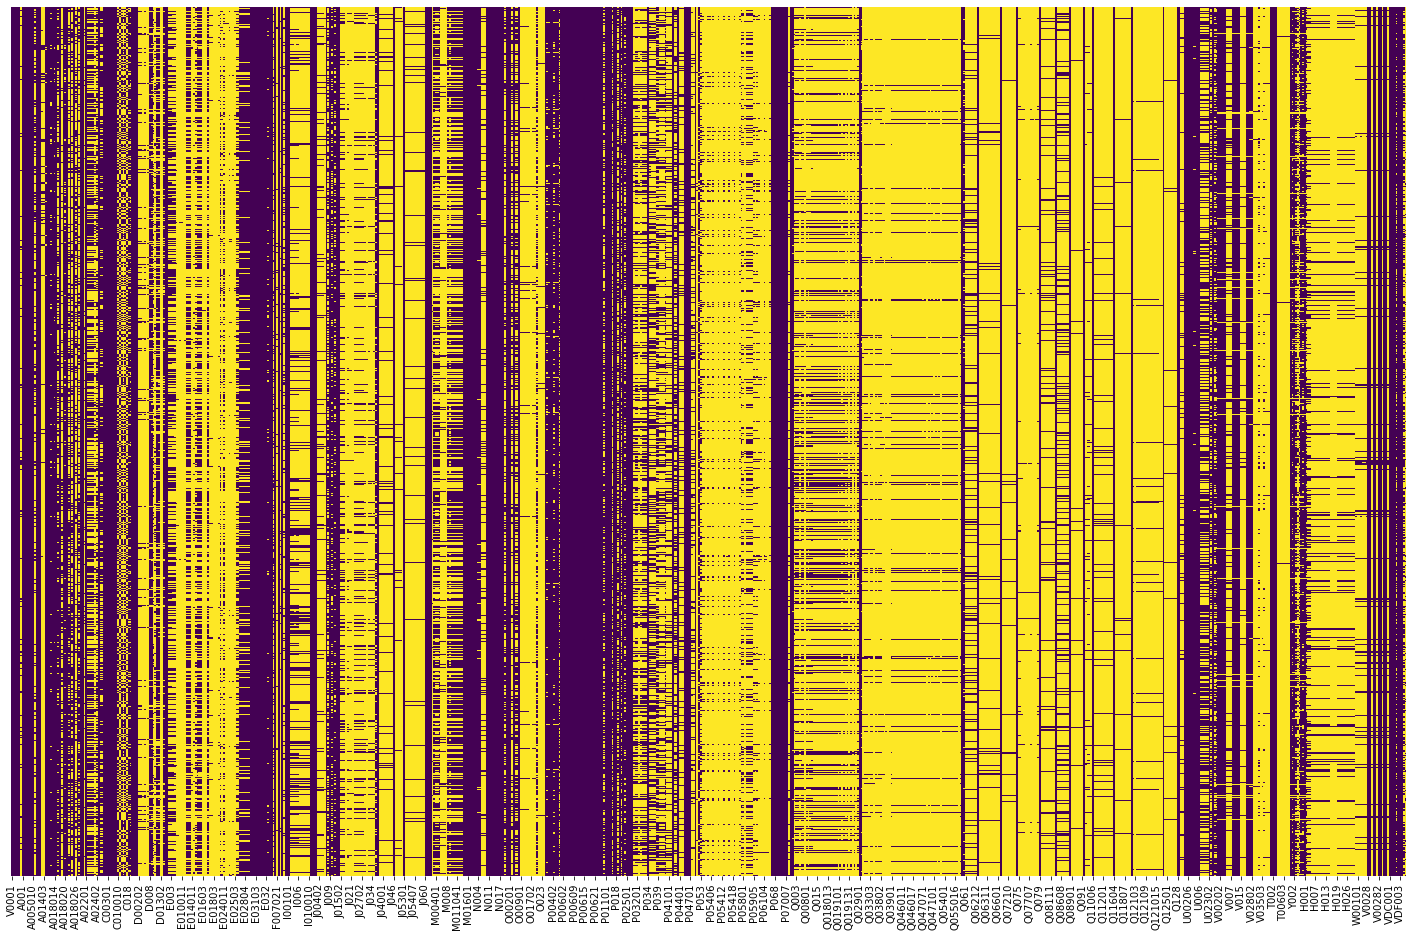

In [24]:
plt.figure(figsize=(25,16))
ax = sb.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df2 = df.dropna(axis=1, thresh=len(df)*0.75)

In [26]:
df2

,V0001,V0022,V0026,V0031,V0025A,A001,A002010,A003010,A004010,A01001,...,V00292,V00283,V00293,VDC001,VDC003,VDD004A,VDE001,VDF002,VDF003,VDF004
0,Rondônia,6,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",5,...,69788.655228,111,11124.0,6.0,3,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,2098.0,350.0,Mais de ¼ até ½ salário mínimo
1,Rondônia,4,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",4,...,27709.936711,111,11122.0,4.0,4,Médio incompleto ou equivalente,Pessoas na força de trabalho,1000.0,250.0,Mais de ¼ até ½ salário mínimo
2,Rondônia,8,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",8,...,69788.655228,111,11124.0,8.0,5,Médio completo ou equivalente,Pessoas na força de trabalho,4000.0,500.0,Mais de ½ até 1 salário mínimo
3,Rondônia,1,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,1,...,69788.655228,111,11124.0,1.0,1,Sem instrução,Pessoas na força de trabalho,324.0,324.0,Mais de ¼ até ½ salário mínimo
4,Rondônia,2,Urbano,Capital,Selecionado,Apartamento,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",2,...,68501.612124,111,11123.0,2.0,1,Superior incompleto ou equivalente,Pessoas fora da força de trabalho,0.0,0.0,Até ¼ salário mínimo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,Distrito Federal,3,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,5,...,467049.713684,531,53124.0,3.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,5400.0,1800.0,Mais de 1 até 2 salários mínimos
90842,Distrito Federal,2,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,5,...,404146.281262,531,53114.0,2.0,2,Médio completo ou equivalente,Pessoas na força de trabalho,3000.0,1500.0,Mais de 1 até 2 salários mínimos
90843,Distrito Federal,4,Rural,Capital,Selecionado,Casa,Alvenaria sem revestimento,Telha sem laje de concreto,Cimento,4,...,369197.009852,531,53123.0,4.0,2,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,1497.0,374.0,Mais de ¼ até ½ salário mínimo
90844,Distrito Federal,3,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",10,...,404146.281262,531,53114.0,3.0,3,Médio completo ou equivalente,Pessoas na força de trabalho,6050.0,2017.0,Mais de 2 até 3 salários mínimos


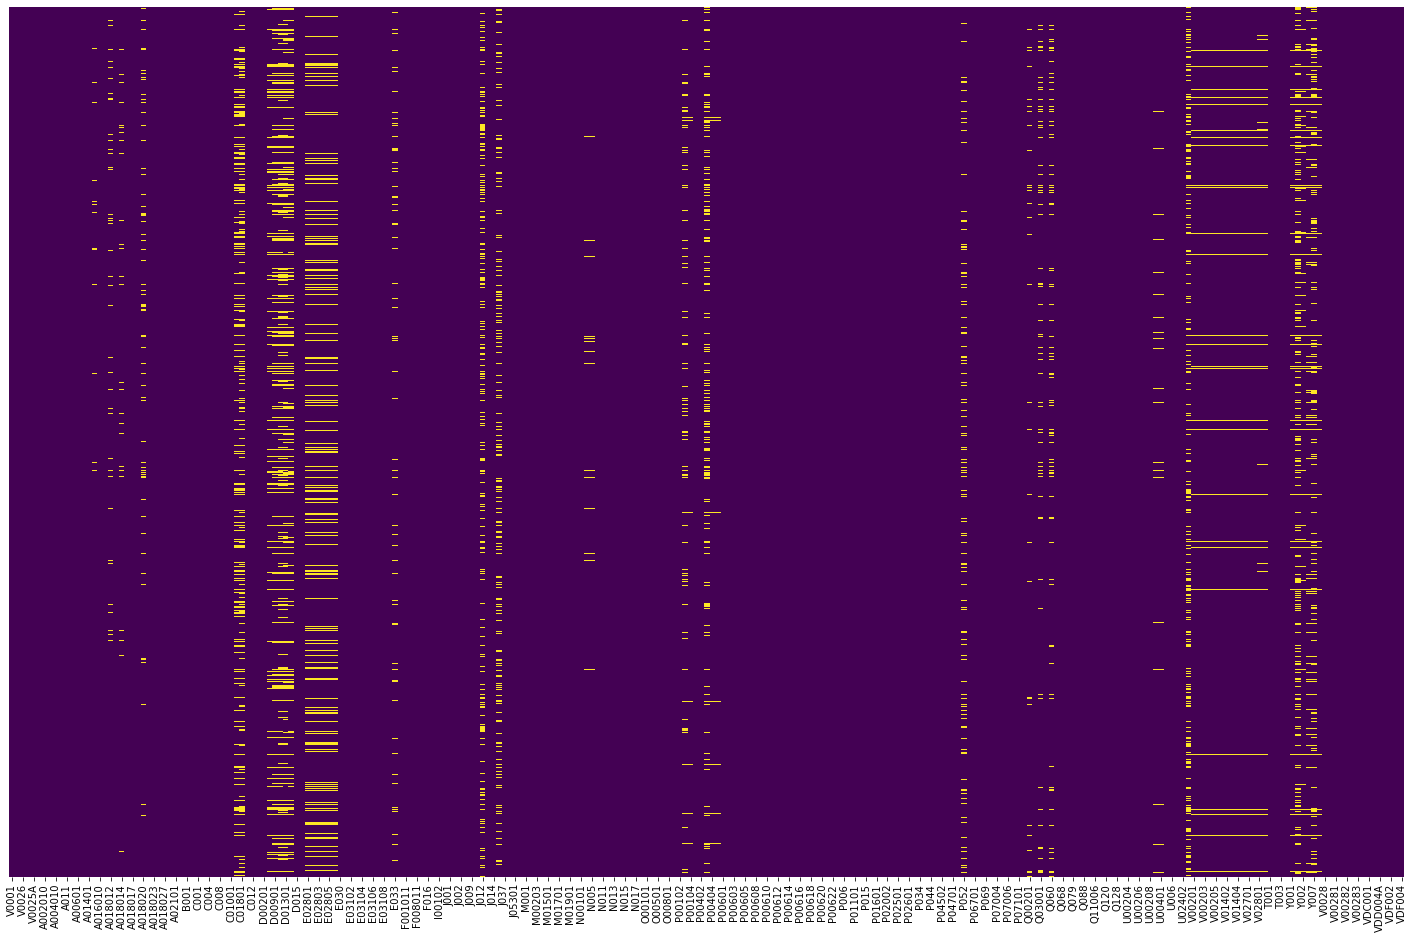

In [27]:
plt.figure(figsize=(25,16))
ax = sb.heatmap(df2.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
df2.V0022.unique()

array([ 6,  4,  8,  1,  2,  3,  5, 11,  7, 10,  9, 12, 16, 14, 13, 17, 23,
       15])

In [29]:
def numerical_to_categorical(serie):
    """
    Transform a series of numerical data into categorical data with labels lower than Q1, between Q1 and Q3, greater than Q3
    """
    intervals = serie.quantile([0.25, 0.75]).to_list()
    
    return serie.apply(lambda v: num_to_label(v, intervals))
    
def num_to_label(value, intervals):
    if isinstance(value, str):
        return value
    elif value <= intervals[0]:
        return 'Menor que ' + str(intervals[0])
    elif value > intervals[0] and value <= intervals[1]:
        return 'Entre ' + str(intervals[0]) + ' e ' + str(intervals[1])
    elif value > intervals[1]:
        return 'Maior que ' + str(intervals[1])
    else:
        None

numerical_to_categorical(df2.V0022)

0          Maior que 4.0
1        Entre 2.0 e 4.0
2          Maior que 4.0
3          Menor que 2.0
4          Menor que 2.0
              ...       
90841    Entre 2.0 e 4.0
90842      Menor que 2.0
90843    Entre 2.0 e 4.0
90844    Entre 2.0 e 4.0
90845      Menor que 2.0
Name: V0022, Length: 90846, dtype: object

In [30]:
df2.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [31]:
for col_type in zip(df2.columns, df2.dtypes):
    #print (col_type[0], col_type[1])
    if col_type[1] != 'object':
        df2[col_type[0]] = numerical_to_categorical(df2[col_type[0]])
        
        

/var/folders/hb/w7p97mc506jbyvl8yxc4tc6w0000gp/T/ipykernel_4507/2042211919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col_type[0]] = numerical_to_categorical(df2[col_type[0]])


In [32]:
df2

,V0001,V0022,V0026,V0031,V0025A,A001,A002010,A003010,A004010,A01001,...,V00292,V00283,V00293,VDC001,VDC003,VDD004A,VDE001,VDF002,VDF003,VDF004
0,Rondônia,Maior que 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Maior que 4.0,Entre 2.0 e 3.0,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
1,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Entre 2.0 e 4.0,Maior que 3.0,Médio incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1200.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
2,Rondônia,Maior que 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Maior que 7.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Maior que 4.0,Maior que 3.0,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Entre 499.0 e 1665.0,Mais de ½ até 1 salário mínimo
3,Rondônia,Menor que 2.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Menor que 2.0,Menor que 2.0,Sem instrução,Pessoas na força de trabalho,Menor que 1200.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
4,Rondônia,Menor que 2.0,Urbano,Capital,Selecionado,Apartamento,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Menor que 2.0,Menor que 2.0,Superior incompleto ou equivalente,Pessoas fora da força de trabalho,Menor que 1200.0,Menor que 499.0,Até ¼ salário mínimo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Entre 2.0 e 4.0,Entre 2.0 e 3.0,Médio completo ou equivalente,Pessoas na força de trabalho,Maior que 4194.0,Maior que 1665.0,Mais de 1 até 2 salários mínimos
90842,Distrito Federal,Menor que 2.0,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Menor que 2.0,Menor que 2.0,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Entre 499.0 e 1665.0,Mais de 1 até 2 salários mínimos
90843,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionado,Casa,Alvenaria sem revestimento,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Entre 2.0 e 4.0,Menor que 2.0,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,Entre 1200.0 e 4194.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
90844,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Maior que 7.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Entre 2.0 e 4.0,Entre 2.0 e 3.0,Médio completo ou equivalente,Pessoas na força de trabalho,Maior que 4194.0,Maior que 1665.0,Mais de 2 até 3 salários mínimos


In [33]:
for col_type in zip(df2.columns, df2.dtypes):
    print (col_type[0], col_type[1])

V0001 object
V0022 object
V0026 object
V0031 object
V0025A object
A001 object
A002010 object
A003010 object
A004010 object
A01001 object
A011 object
A005010 object
A00601 object
A009010 object
A01401 object
A01501 object
A016010 object
A018011 object
A018012 object
A018013 object
A018014 object
A018015 object
A018017 object
A018019 object
A018020 object
A018021 object
A018023 object
A018025 object
A018027 object
A01901 object
A02101 object
A02201 object
B001 object
B004 object
C001 object
C00301 object
C004 object
C006 object
C008 object
C009 object
C01001 object
C018 object
C01801 object
C011 object
C012 object
D001 object
D00201 object
D008 object
D00901 object
D01201 object
D01301 object
D014 object
D015 object
E001 object
E02801 object
E02802 object
E02803 object
E02804 object
E02805 object
E02806 object
E030 object
E03101 object
E03102 object
E03103 object
E03104 object
E03105 object
E03106 object
E03107 object
E03108 object
E032 object
E033 object
E027 object
F001011 object
F0070

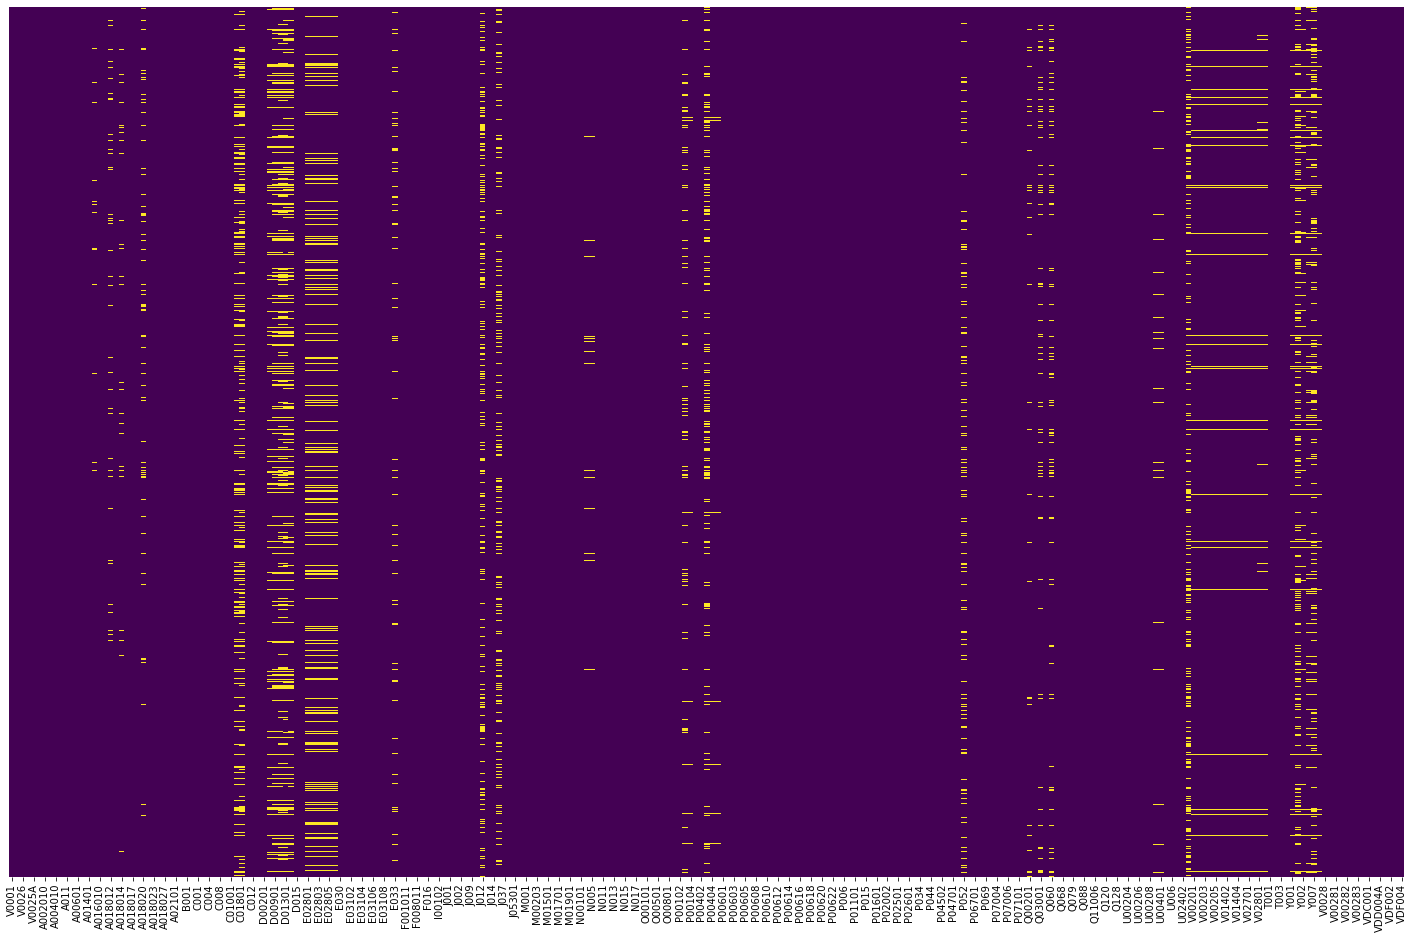

In [34]:
plt.figure(figsize=(25,16))
ax = sb.heatmap(df2.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
df2

,V0001,V0022,V0026,V0031,V0025A,A001,A002010,A003010,A004010,A01001,...,V00292,V00283,V00293,VDC001,VDC003,VDD004A,VDE001,VDF002,VDF003,VDF004
0,Rondônia,Maior que 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Maior que 4.0,Entre 2.0 e 3.0,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
1,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Entre 2.0 e 4.0,Maior que 3.0,Médio incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1200.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
2,Rondônia,Maior que 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Maior que 7.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Maior que 4.0,Maior que 3.0,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Entre 499.0 e 1665.0,Mais de ½ até 1 salário mínimo
3,Rondônia,Menor que 2.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Menor que 2.0,Menor que 2.0,Sem instrução,Pessoas na força de trabalho,Menor que 1200.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
4,Rondônia,Menor que 2.0,Urbano,Capital,Selecionado,Apartamento,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Menor que 2.0,Menor que 2.0,Superior incompleto ou equivalente,Pessoas fora da força de trabalho,Menor que 1200.0,Menor que 499.0,Até ¼ salário mínimo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Entre 2.0 e 4.0,Entre 2.0 e 3.0,Médio completo ou equivalente,Pessoas na força de trabalho,Maior que 4194.0,Maior que 1665.0,Mais de 1 até 2 salários mínimos
90842,Distrito Federal,Menor que 2.0,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Menor que 2.0,Menor que 2.0,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Entre 499.0 e 1665.0,Mais de 1 até 2 salários mínimos
90843,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionado,Casa,Alvenaria sem revestimento,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Entre 2.0 e 4.0,Menor que 2.0,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,Entre 1200.0 e 4194.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
90844,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Maior que 7.0,...,Entre 100785.08069047 e 591603.63075811,Maior que 354.0,Maior que 35423.0,Entre 2.0 e 4.0,Entre 2.0 e 3.0,Médio completo ou equivalente,Pessoas na força de trabalho,Maior que 4194.0,Maior que 1665.0,Mais de 2 até 3 salários mínimos


In [36]:
new_columns = [code_to_desc[col] for col in df2.columns.to_list()]
df2.columns = new_columns

In [37]:
df2

,[V0001] Unidade da Federação,[V0022] Total de moradores,[V0026] Tipo de situação censitária,[V0031] Tipo de área,[V0025A] Seleção do morador de 15 anos ou mais para responder o questionário individual,[A001] Tipo do domicílio,[A002010] Qual é o material que predomina na construção das paredes externas deste domicílio?,[A003010] Material predominante na cobertura (telhado) do domicílio,[A004010] Qual é o material que predomina no piso deste domicílio,[A01001] Quantos cômodos têm este domicílio,...,[V00292] Projeção da população para moradores selecionados,[V00283] Domínio de projeção para domicílio e moradores,[V00293] Domínio de projeção para morador selecionado,"[VDC001] Número de componentes do domicílio (exclusive as pessoas cuja condição na família era pensionista, empregado doméstico ou parente do empregado doméstico)",[VDC003] Total de moradores com 15 anos ou mais,[VDD004A] Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino Fundamental - SISTEMA DE 9 ANOS,[VDE001] Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade,"[VDF002] ""Rendimento domiciliar (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)""","[VDF003] ""Rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)""","[VDF004] Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)"
0,Rondônia,Maior que 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Maior que 4.0,Entre 2.0 e 3.0,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
1,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Entre 2.0 e 4.0,Maior que 3.0,Médio incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1200.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
2,Rondônia,Maior que 4.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Maior que 7.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Maior que 4.0,Maior que 3.0,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1200.0 e 4194.0,Entre 499.0 e 1665.0,Mais de ½ até 1 salário mínimo
3,Rondônia,Menor que 2.0,Urbano,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Menor que 2.0,Menor que 2.0,Sem instrução,Pessoas na força de trabalho,Menor que 1200.0,Menor que 499.0,Mais de ¼ até ½ salário mínimo
4,Rondônia,Menor que 2.0,Urbano,Capital,Selecionado,Apartamento,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,"Cerâmica, lajota ou pedra (inclusive outros pi...",Menor que 5.0,...,Menor que 100785.08069047,Menor que 221.0,Menor que 22112.0,Menor que 2.0,Menor que 2.0,Superior incompleto ou equivalente,Pessoas fora da força de trabalho,Menor que 1200.0,Menor que 499.0,Até ¼ salário mínimo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionado,Casa,Alvenaria com revestimento ou taipa revestida,Telha sem laje de concreto,Cimento,Menor que 5.

In [38]:
df2.to_csv('df.csv', index=False)